In [90]:
import pandas as pd

data_path = 'CM_logD_regression.xlsx'

elements = ["Mn", "Co", "Ni", "Cu"]


df = pd.read_excel(data_path, sheet_name="combined_new")
# Remove rows with NaN values
df = df.dropna()

# Reset index after dropping NaN values
df = df.reset_index(drop=True)
# # scale each column by doing df[col] = df[col] / abs(df[col]).max()

sf_dict = {}
for col in df.columns:
    scaled_column_name = f"{col}_scaled"
    if df[col].dtype in ['float64', 'int64']:
        if col in ["pH", "[D2EHPA] ", "log D (obs)_Mn", "log D (obs)_Co", "log D (obs)_Ni", "log D (obs)_Cu"]:
            max_value = 1
            df[scaled_column_name] = df[col] / max_value
        else:
            # if col in ["[Mn] (mol/L)", "[Co] (mol/L)", "[Ni] (mol/L)", "[Cu] (mol/L)"]:
            #     df[scaled_column_name] =  (df[col] - df[col].mean() )  / (df[col].max() - df[col].min() )    
            # else:
            max_value = abs(df[col]).max()
            df[scaled_column_name] = df[col] / max_value

        sf_dict[col] = max_value
        print(f"Scaled {col} by {max_value}")



Scaled pH by 1
Scaled A/O by 2.61
Scaled [D2EHPA]  by 1
Scaled extraction_Mn by 99.97
Scaled extraction_Co by 70.91
Scaled extraction_Ni by 43.58
Scaled extraction_Cu by 96.59
Scaled Dobs_Mn by 4998.499999999811
Scaled Dobs_Co by 3.0813008130081303
Scaled Dobs_Ni by 1.2164683177870699
Scaled Dobs_Cu by 41.60344827586202
Scaled log D (obs)_Mn by 1
Scaled log D (obs)_Co by 1
Scaled log D (obs)_Ni by 1
Scaled log D (obs)_Cu by 1
Scaled [Mn] (mol/L) by 0.19
Scaled [Co] (mol/L) by 5.6e-05
Scaled [Ni] (mol/L) by 0.00014
Scaled [Cu] (mol/L) by 0.000189


## Some extra data points were removed 

In [91]:
df

,pH,A/O,[D2EHPA],extraction_Mn,extraction_Co,extraction_Ni,extraction_Cu,Dobs_Mn,Dobs_Co,Dobs_Ni,...,Dobs_Ni_scaled,Dobs_Cu_scaled,log D (obs)_Mn_scaled,log D (obs)_Co_scaled,log D (obs)_Ni_scaled,log D (obs)_Cu_scaled,[Mn] (mol/L)_scaled,[Co] (mol/L)_scaled,[Ni] (mol/L)_scaled,[Cu] (mol/L)_scaled
0,3.86,2.00,0.15,11.69,6.10,6.18,37.44,0.264749,0.129925,0.131742,...,0.108298,0.028770,-0.577165,-0.886306,-0.880277,0.078069,0.736842,1.000000,1.000000,0.740741
1,3.53,1.00,0.35,87.23,36.73,30.81,93.83,6.830854,0.580528,0.445296,...,0.366056,0.365534,0.834475,-0.236177,-0.351352,1.182057,0.736842,1.000000,1.000000,0.317460
2,2.59,2.00,0.15,16.69,6.33,3.95,16.41,0.400672,0.135155,0.082249,...,0.067613,0.009437,-0.397211,-0.869167,-1.084870,-0.406016,0.736842,1.000000,1.000000,0.740741
3,3.06,1.00,0.35,87.57,27.65,5.80,83.19,7.045052,0.382170,0.061571,...,0.050615,0.118953,0.847884,-0.417743,-1.210623,0.694503,0.736842,0.428571,1.000000,0.740741
4,3.54,1.00,0.15,88.85,31.68,13.02,80.80,7.968610,0.463700,0.149690,...,0.123053,0.101153,0.901383,-0.333763,-0.824808,0.624110,0.315789,1.000000,0.428571,0.740741
5,2.50,2.00,0.15,2.53,5.30,3.60,20.34,0.051913,0.111932,0.074689,...,0.061398,0.012275,-1.284720,-0.951044,-1.126745,-0.291859,0.736842,0.428571,1.000000,0.317460
6,2.50,2.00,0.35,31.68,16.14,8.69,56.60,0.927400,0.384927,0.190341,...,0.156470,0.062694,-0.032733,-0.414621,-0.720469,0.416357,0.315789,1.000000,1.000000,0.317460
7,3.54,1.00,0.35,71.67,24.71,7.61,82.72,2.529827,0.328198,0.082368,...,0.067711,0.115063,0.403091,-0.483865,-1.084240,0.680067,0.736842,1.000000,0.428571,0.740741
8,3.51,2.00,0.15,37.95,22.18,16.83,64.64,1.223207,0.570033,0.404713,...,0.332695,0.087880,0.087500,-0.244100,-0.392853,0.563019,0.315789,0.428571,1.000000,0.317460
9,2.56,1.00,0.35,99.38,44.25,25.13,85.06,160.290323,0.793722,0.335648,...,0.275920,0.136850,2.204907,-0.100332,-0.474115,0.755375,0.315789,1.000000,1.000000,0.317460


In [92]:
# remove row 27 and reindex

df = df.drop(index=29)  # A/O is much lower than other cases
df = df.drop(index=27)  # [DEH2PA] is suspect (Much lower than other cases)
df = df.drop(index=21)  # Ni log D is suspect (based on residual plot)
df = df.drop(index=23)
df = df.drop(index=1)
df = df.drop(index=9)
df = df.reset_index(drop=True)


# Drop other suspect rows based on where we hit the lower bound
# These dont work as well.
# df = df.drop(index=0)
# df = df.drop(index=3)
# df = df.drop(index=10)

# df = df.reset_index(drop=True)

In [93]:
df

,pH,A/O,[D2EHPA],extraction_Mn,extraction_Co,extraction_Ni,extraction_Cu,Dobs_Mn,Dobs_Co,Dobs_Ni,...,Dobs_Ni_scaled,Dobs_Cu_scaled,log D (obs)_Mn_scaled,log D (obs)_Co_scaled,log D (obs)_Ni_scaled,log D (obs)_Cu_scaled,[Mn] (mol/L)_scaled,[Co] (mol/L)_scaled,[Ni] (mol/L)_scaled,[Cu] (mol/L)_scaled
0,3.86,2.00,0.15,11.69,6.10,6.18,37.44,0.264749,0.129925,0.131742,...,0.108298,0.028770,-0.577165,-0.886306,-0.880277,0.078069,0.736842,1.000000,1.000000,0.740741
1,2.59,2.00,0.15,16.69,6.33,3.95,16.41,0.400672,0.135155,0.082249,...,0.067613,0.009437,-0.397211,-0.869167,-1.084870,-0.406016,0.736842,1.000000,1.000000,0.740741
2,3.06,1.00,0.35,87.57,27.65,5.80,83.19,7.045052,0.382170,0.061571,...,0.050615,0.118953,0.847884,-0.417743,-1.210623,0.694503,0.736842,0.428571,1.000000,0.740741
3,3.54,1.00,0.15,88.85,31.68,13.02,80.80,7.968610,0.463700,0.149690,...,0.123053,0.101153,0.901383,-0.333763,-0.824808,0.624110,0.315789,1.000000,0.428571,0.740741
4,2.50,2.00,0.15,2.53,5.30,3.60,20.34,0.051913,0.111932,0.074689,...,0.061398,0.012275,-1.284720,-0.951044,-1.126745,-0.291859,0.736842,0.428571,1.000000,0.317460
5,2.50,2.00,0.35,31.68,16.14,8.69,56.60,0.927400,0.384927,0.190341,...,0.156470,0.062694,-0.032733,-0.414621,-0.720469,0.416357,0.315789,1.000000,1.000000,0.317460
6,3.54,1.00,0.35,71.67,24.71,7.61,82.72,2.529827,0.328198,0.082368,...,0.067711,0.115063,0.403091,-0.483865,-1.084240,0.680067,0.736842,1.000000,0.428571,0.740741
7,3.51,2.00,0.15,37.95,22.18,16.83,64.64,1.223207,0.570033,0.404713,...,0.332695,0.087880,0.087500,-0.244100,-0.392853,0.563019,0.315789,0.428571,1.000000,0.317460
8,2.67,2.00,0.15,21.44,5.44,20.90,10.65,0.545825,0.115059,0.528445,...,0.434409,0.005730,-0.262947,-0.939079,-0.277000,-0.622715,0.736842,1.000000,0.428571,0.740741
9,2.51,1.00,0.35,22.90,15.20,10.46,60.66,0.297017,0.179245,0.116819,...,0.096032,0.037063,-0.527219,-0.746552,-0.932485,0.188068,0.736842,0.428571,0.428571,0.317460


In [94]:
n_data = df.shape[0]

from idaes.core.util import model_statistics as mstat
import pyomo.environ as pyo
import numpy as np

m = pyo.ConcreteModel()

m.I = pyo.RangeSet(0, n_data-1)
m.elements = pyo.Set(initialize = elements)

# Input data vars
m.pH = pyo.Var(m.I, domain=pyo.Reals, initialize=0.0)
m.C_ex = pyo.Var(m.I, domain=pyo.Reals, initialize=0.0)
m.Cfeed = pyo.Var(m.I, m.elements, domain=pyo.Reals, initialize=0.0)


# Output variable
m.logD = pyo.Var(m.I, m.elements, domain=pyo.Reals, initialize=0.0)


# Parameters
ablist = [1, 2, 3, 4, 5, 6]

ai_list = [3, 4, 5, 6, 7]
bi_list = [1, 2]
ci_list = [1, 2, 3, 4]
di_list = [1, 2, 3, 4]

m.a_set = pyo.Set(initialize = ablist)
m.b_set = pyo.Set(initialize = ablist)

m.ai_set = pyo.Set(initialize = ai_list)
m.bi_set = pyo.Set(initialize = bi_list)
m.ci_set = pyo.Set(initialize = ci_list)
m.di_set = pyo.Set(initialize = di_list)

m.a12 = pyo.Var(m.a_set, m.elements, domain=pyo.Reals, initialize=0.5)
m.b12 = pyo.Var(m.b_set, m.elements, domain=pyo.Reals, initialize=0.5)
m.c12 = pyo.Var(m.ci_set, m.elements, domain=pyo.Reals, initialize=0.5)
m.d12 = pyo.Var(m.di_set, m.elements, domain=pyo.Reals, initialize=0.0)

m.ai = pyo.Var(m.ai_set, domain=pyo.NonNegativeReals, initialize=0.5)

m.alpha = pyo.Var(m.I, m.elements, domain=pyo.Reals, initialize=0.5)
m.beta = pyo.Var(m.I, m.elements, domain=pyo.Reals, initialize=0.5)

name_mapper_general = {
    'pH_scaled': m.pH,
    '[D2EHPA] _scaled': m.C_ex}


def map_generator(element):
    return {
    f'[{element}] (mol/L)_scaled': m.Cfeed,
    f'log D (obs)_{element}_scaled': m.logD}



name_mapper_elements = {}

for element in m.elements:
    name_mapper_elements[element] = map_generator(element)


# # Initialize input variables
for col in name_mapper_general.keys():
    for i in df.index:
        name_mapper_general[col][i].fix(df[col][i])


for element in m.elements:
    for i in df.index:
        for col in name_mapper_elements[element].keys():
            name_mapper_elements[element][col][i, element].fix(df[col][i])
        
# # Model variales

m.logD_scaled_pred =  pyo.Var(m.I, m.elements, initialize = 0.1, domain=pyo.Reals)
m.Cext_net_pred = pyo.Var(m.I, domain=pyo.Reals, initialize=0.1, bounds = (1e-3, 2))
m.logCext_net_pred = pyo.Var(m.I, domain=pyo.Reals, initialize=0.1, bounds = (np.log10(1e-10), np.log10(2)))



# Constraints

@m.Constraint(m.I)
def logCext_net_pred_constraint(m, i):
    return 10**(m.logCext_net_pred[i]) == m.Cext_net_pred[i]


m.resid = pyo.Var(m.I, m.elements)

@m.Constraint(m.I, m.elements)
def alpha_const(m, i, e):
    linear_term = m.a12[3, e]*m.Cfeed[i, "Mn"] + m.a12[4, e]*m.Cfeed[i, "Co"] +  m.a12[5, e]*m.Cfeed[i, "Ni"] + m.a12[6, e]*m.Cfeed[i, "Cu"]
    quad_term = m.c12[4, e]*m.Cfeed[i, "Cu"]**2 + m.c12[3, e]*m.Cfeed[i, "Ni"]**2 + m.c12[1, e]*m.Cfeed[i, "Mn"]**2 #+ m.c12[2, e]*m.Cfeed[i, "Co"]**2
    cube_term = m.d12[1, e]*m.Cfeed[i, "Mn"]**3 + m.d12[2, e]*m.Cfeed[i, "Co"]**3 + m.d12[3, e]*m.Cfeed[i, "Ni"]**3 + m.d12[4, e]*m.Cfeed[i, "Cu"]**3
    return (m.alpha[i, e] - m.a12[1, e]  - m.a12[2, e]*m.C_ex[i] 
            - linear_term 
            - quad_term 
            # + cube_term
            ) == 0

@m.Constraint(m.I, m.elements)
def b_const(m, i, e):
    return m.beta[i, e] == m.b12[1, e] + m.b12[2, e]*m.logCext_net_pred[i]

@m.Constraint(m.I)
def Cext_net_pred_constraint(m, i):
    return m.Cext_net_pred[i] == m.C_ex[i] - m.ai[3]*m.Cfeed[i, "Mn"] - m.ai[4]*m.Cfeed[i, "Co"]  -m.ai[5]*m.Cfeed[i, "Cu"] - m.ai[6]*m.Cfeed[i, "Ni"] - m.ai[7]

@m.Constraint(m.I)
def Cext_net_value_constraint(m, i):
    return  m.C_ex[i] - m.Cext_net_pred[i]>=0

@m.Constraint(m.I, m.elements)
def logD_scaled_pred_constraint(m, i, e):
    return m.logD_scaled_pred[i, e] == m.alpha[i, e]*m.pH[i] + m.beta[i, e]

@m.Objective(sense = pyo.minimize)
def objective_function(m):
    return sum((m.logD_scaled_pred[i, e] - m.logD[i, e])**2 for i in m.I for e in m.elements)

# contributing terms
@m.Expression(m.elements)
def sse_element(m, e):
    return sum((m.logD_scaled_pred[i, e] - m.logD[i, e])**2 for i in m.I)


@m.Expression(m.I, m.elements)
def D(m, i, e):
    return 10**m.logD_scaled_pred[i, e]

@m.Expression(m.I, m.elements)
def extraction_perc(m, i, e):
    A_O = df["A/O"][i]

    return m.D[i,e] / (m.D[i,e] + A_O) *100

print(n_data)
print(mstat.degrees_of_freedom(m))
solver = pyo.SolverFactory('ipopt_v2')
solver.options['halt_on_ampl_error'] = 'no'
solver.options['max_iter'] = 200

results = solver.solve(m, tee=True, symbolic_solver_labels=True)

28
49
Ipopt 3.13.2: halt_on_ampl_error=no
max_iter=200


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale sc

In [95]:
m.objective_function()/n_data

np.float64(0.21294757222119484)

In [96]:
m.Cext_net_pred.pprint()

Cext_net_pred : Size=28, Index=I
    Key : Lower : Value                : Upper : Fixed : Stale : Domain
      0 : 0.001 :                0.001 :     2 : False : False :  Reals
      1 : 0.001 :                0.001 :     2 : False : False :  Reals
      2 : 0.001 :  0.20100001324522776 :     2 : False : False :  Reals
      3 : 0.001 :  0.05332448327707944 :     2 : False : False :  Reals
      4 : 0.001 : 0.033818369266489415 :     2 : False : False :  Reals
      5 : 0.001 :    0.286142844998625 :     2 : False : False :  Reals
      6 : 0.001 :  0.20099999016644038 :     2 : False : False :  Reals
      7 : 0.001 :  0.08614286237712844 :     2 : False : False :  Reals
      8 : 0.001 :                0.001 :     2 : False : False :  Reals
      9 : 0.001 :   0.2338183635662054 :     2 : False : False :  Reals
     10 : 0.001 :  0.05332450635586684 :     2 : False : False :  Reals
     11 : 0.001 :  0.08614283929834103 :     2 : False : False :  Reals
     12 : 0.001 : 0.03381836926

In [97]:
m.logD[:, 'Ni'].pprint()

{Member of logD} : Size=112, Index=I*elements
    Key       : Lower : Value               : Upper : Fixed : Stale : Domain
    (0, 'Ni') :  None : -0.8802769578583425 :  None :  True :  True :  Reals
{Member of logD} : Size=112, Index=I*elements
    Key       : Lower : Value              : Upper : Fixed : Stale : Domain
    (1, 'Ni') :  None : -1.084870277907271 :  None :  True :  True :  Reals
{Member of logD} : Size=112, Index=I*elements
    Key       : Lower : Value             : Upper : Fixed : Stale : Domain
    (2, 'Ni') :  None : -1.21062290922994 :  None :  True :  True :  Reals
{Member of logD} : Size=112, Index=I*elements
    Key       : Lower : Value              : Upper : Fixed : Stale : Domain
    (3, 'Ni') :  None : -0.824808419097144 :  None :  True :  True :  Reals
{Member of logD} : Size=112, Index=I*elements
    Key       : Lower : Value               : Upper : Fixed : Stale : Domain
    (4, 'Ni') :  None : -1.1267445374715623 :  None :  True :  True :  Reals
{Member 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

C:\Users\ad00105\AppData\Local\Temp\1\ipykernel_48860\2415438403.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


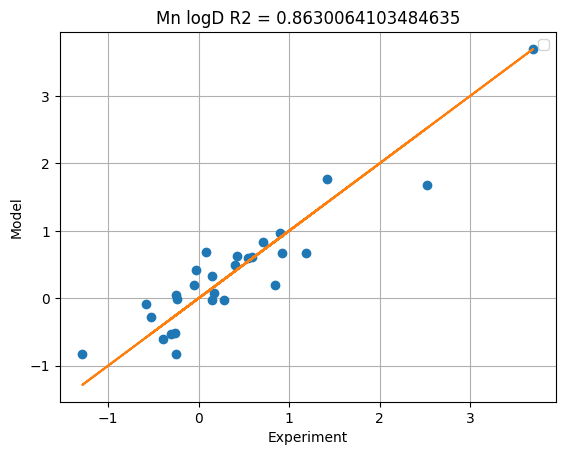

C:\Users\ad00105\AppData\Local\Temp\1\ipykernel_48860\2415438403.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


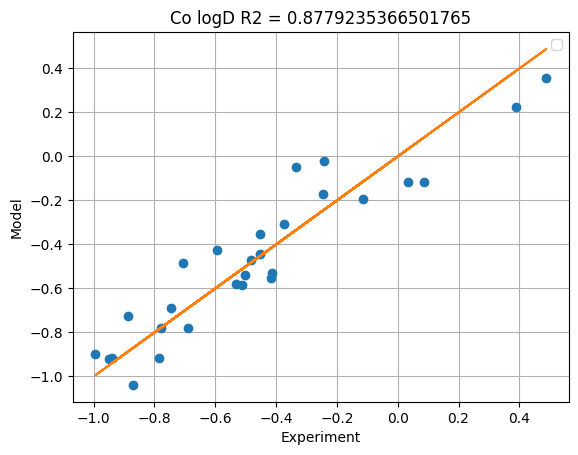

C:\Users\ad00105\AppData\Local\Temp\1\ipykernel_48860\2415438403.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


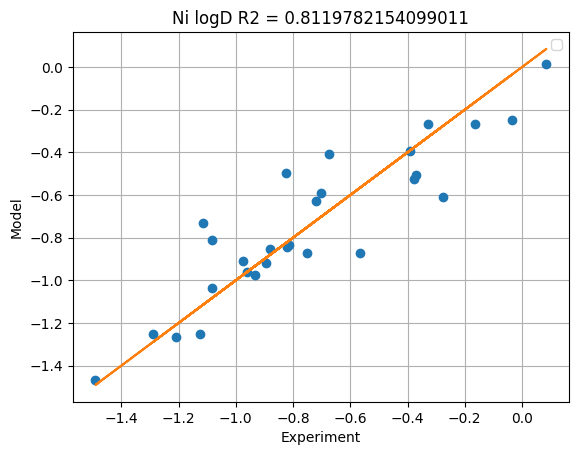

C:\Users\ad00105\AppData\Local\Temp\1\ipykernel_48860\2415438403.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


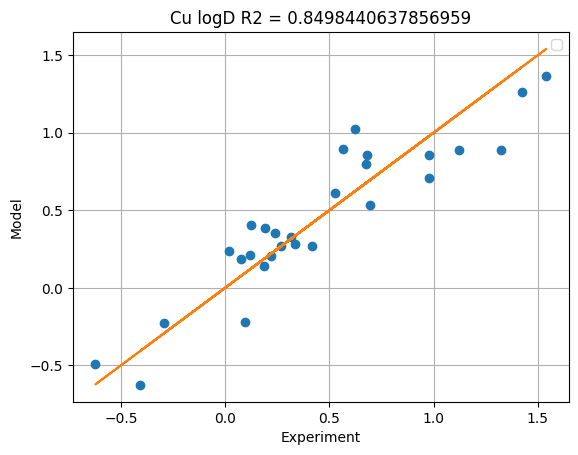

In [98]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

for element in m.elements:
    # for i in m.I:
        # if 0.0 <= m.logD_scaled_pred[i,element]() <= 0.2:
    plt.plot(m.logD[:, element](), m.logD_scaled_pred[:,element](), 'o')#, label=f'{i}')
    plt.plot(m.logD[:, element](), m.logD[:, element]())
    plt.xlabel(f'Experiment')
    plt.ylabel('Model')
    plt.grid()
    plt.title(f'{element} logD R2 = {r2_score(m.logD[:, element](), m.logD_scaled_pred[:,element]())}')
    plt.legend()
    plt.show()

In [99]:
for i in pyo.RangeSet(0,n_data-1):
    print(f'exp : {m.logD[i, 'Mn']()}, model : {m.logD_scaled_pred[i, 'Mn']()}')

exp : -0.5771653779399436, model : -0.09141306545911923
exp : -0.39721080212669213, model : -0.6086003295599517
exp : 0.8478842210660318, model : 0.2030047055139814
exp : 0.9013825647571406, model : 0.9645659467927266
exp : -1.284720449224846, model : -0.82357185077912
exp : -0.03273268909951155, model : 0.41689300015480896
exp : 0.4030908299491032, model : 0.4999794136037594
exp : 0.08749999006073181, model : 0.6927173450051638
exp : -0.26294669809417964, model : -0.5098576512160095
exp : -0.527218895711069, model : -0.27202701282678
exp : -0.0556657792209242, model : 0.1934070424463314
exp : 1.191906069484436, model : 0.6736273417462764
exp : -0.24724076597851302, model : -0.8199337836573872
exp : 0.9231832334919453, model : 0.6736273417462764
exp : 0.15263767684164384, model : 0.3253297789451579
exp : 1.4191059391024101, model : 1.762711959333553
exp : 0.7079783689468605, model : 0.8312124068877825
exp : 2.5276080578193056, model : 1.6850052389017485
exp : 0.5931574385275287, model 

In [100]:
df

,pH,A/O,[D2EHPA],extraction_Mn,extraction_Co,extraction_Ni,extraction_Cu,Dobs_Mn,Dobs_Co,Dobs_Ni,...,Dobs_Ni_scaled,Dobs_Cu_scaled,log D (obs)_Mn_scaled,log D (obs)_Co_scaled,log D (obs)_Ni_scaled,log D (obs)_Cu_scaled,[Mn] (mol/L)_scaled,[Co] (mol/L)_scaled,[Ni] (mol/L)_scaled,[Cu] (mol/L)_scaled
0,3.86,2.00,0.15,11.69,6.10,6.18,37.44,0.264749,0.129925,0.131742,...,0.108298,0.028770,-0.577165,-0.886306,-0.880277,0.078069,0.736842,1.000000,1.000000,0.740741
1,2.59,2.00,0.15,16.69,6.33,3.95,16.41,0.400672,0.135155,0.082249,...,0.067613,0.009437,-0.397211,-0.869167,-1.084870,-0.406016,0.736842,1.000000,1.000000,0.740741
2,3.06,1.00,0.35,87.57,27.65,5.80,83.19,7.045052,0.382170,0.061571,...,0.050615,0.118953,0.847884,-0.417743,-1.210623,0.694503,0.736842,0.428571,1.000000,0.740741
3,3.54,1.00,0.15,88.85,31.68,13.02,80.80,7.968610,0.463700,0.149690,...,0.123053,0.101153,0.901383,-0.333763,-0.824808,0.624110,0.315789,1.000000,0.428571,0.740741
4,2.50,2.00,0.15,2.53,5.30,3.60,20.34,0.051913,0.111932,0.074689,...,0.061398,0.012275,-1.284720,-0.951044,-1.126745,-0.291859,0.736842,0.428571,1.000000,0.317460
5,2.50,2.00,0.35,31.68,16.14,8.69,56.60,0.927400,0.384927,0.190341,...,0.156470,0.062694,-0.032733,-0.414621,-0.720469,0.416357,0.315789,1.000000,1.000000,0.317460
6,3.54,1.00,0.35,71.67,24.71,7.61,82.72,2.529827,0.328198,0.082368,...,0.067711,0.115063,0.403091,-0.483865,-1.084240,0.680067,0.736842,1.000000,0.428571,0.740741
7,3.51,2.00,0.15,37.95,22.18,16.83,64.64,1.223207,0.570033,0.404713,...,0.332695,0.087880,0.087500,-0.244100,-0.392853,0.563019,0.315789,0.428571,1.000000,0.317460
8,2.67,2.00,0.15,21.44,5.44,20.90,10.65,0.545825,0.115059,0.528445,...,0.434409,0.005730,-0.262947,-0.939079,-0.277000,-0.622715,0.736842,1.000000,0.428571,0.740741
9,2.51,1.00,0.35,22.90,15.20,10.46,60.66,0.297017,0.179245,0.116819,...,0.096032,0.037063,-0.527219,-0.746552,-0.932485,0.188068,0.736842,0.428571,0.428571,0.317460


C:\Users\ad00105\AppData\Local\Temp\1\ipykernel_48860\2961781852.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


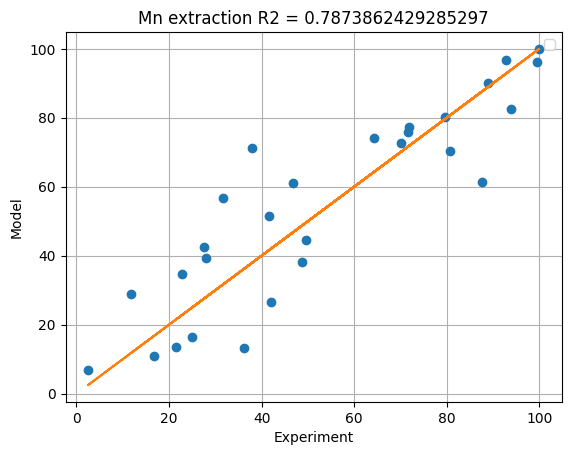

C:\Users\ad00105\AppData\Local\Temp\1\ipykernel_48860\2961781852.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


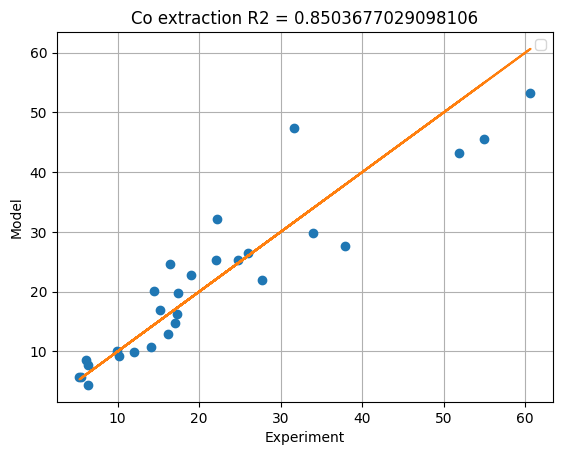

C:\Users\ad00105\AppData\Local\Temp\1\ipykernel_48860\2961781852.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


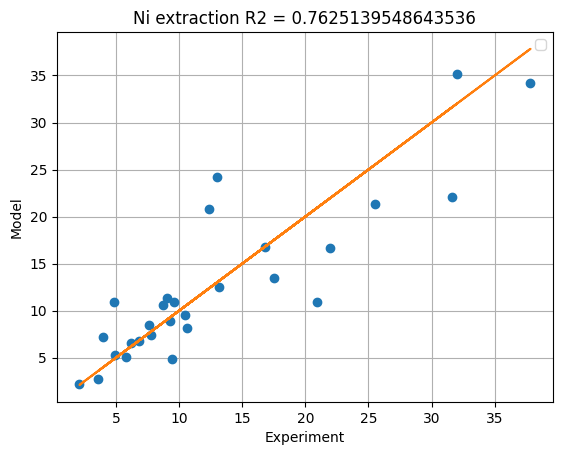

C:\Users\ad00105\AppData\Local\Temp\1\ipykernel_48860\2961781852.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


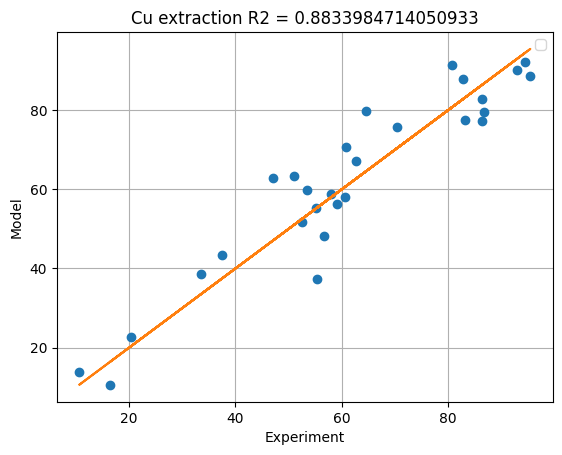

In [101]:
for element in m.elements:
    plt.plot(df[f"extraction_{element}"], m.extraction_perc[:, element](), 'o')
    plt.plot(df[f"extraction_{element}"], df[f"extraction_{element}"])
    plt.plot()
    plt.xlabel('Experiment')
    plt.ylabel('Model')
    plt.grid()
    plt.title(f'{element} extraction R2 = {r2_score(df[f"extraction_{element}"], m.extraction_perc[:, element]())}')
    plt.legend()
    plt.show()

In [102]:
from sklearn.metrics import r2_score

R_2_logD_values = {}
R_2_extract_values = {}
for element in m.elements:
    R_2_logD_values[element] = r2_score(m.logD[:, element](), m.logD_scaled_pred[:,element]())
    R_2_extract_values[element] = r2_score(df[f"extraction_{element}"], m.extraction_perc[:, element]())

print(R_2_logD_values)
print(R_2_extract_values)

{'Mn': 0.8630064103484635, 'Co': 0.8779235366501765, 'Ni': 0.8119782154099011, 'Cu': 0.8498440637856959}
{'Mn': 0.7873862429285297, 'Co': 0.8503677029098106, 'Ni': 0.7625139548643536, 'Cu': 0.8833984714050933}


In [103]:
df.to_excel("debug_data.xlsx")

In [104]:
scale = {1:0.19, 2:5.6e-5, 3:0.00014, 4:0.000189, 5:1}
for element in m.elements:
    print(f"{element} a121, a122 = {m.a12[1, element]()}, {m.a12[2, element]()}")
    print(f"{element} a123, a124, a125, a126 = {m.a12[3, element]()/scale[1]}, {m.a12[4, element]()/scale[2]}, {m.a12[5, element]()/scale[3]}, {m.a12[6, element]()/scale[4]}")
    print(f"{element} c121, c123, c124 = {m.c12[1, element]()/scale[1]**2}, {m.c12[3, element]()/scale[3]**2}, {m.c12[4, element]()/scale[4]**2}")
    print(f"{element} b12, b12 = {m.b12[:, element]()}")
for s in scale:    
    print(f"ai({s}): {m.ai[s+2]()/scale[s]}")

Mn a121, a122 = 1.292175759426978, 1.0438480756686643
Mn a123, a124, a125, a126 = -10.657900868347198, -882.6583480499263, -7674.208143232135, 3043.579178494905
Mn c121, c123, c124 = 32.50305377752957, 36822261.68710199, -10738369.568383299
Mn b12, b12 = [-1.8001810339579813, -0.04561479700129898, 0.5, 0.5, 0.5, 0.5]
Co a121, a122 = 0.8954495449630524, 0.239602864504125
Co a123, a124, a125, a126 = 6.579919121114424, -2045.4933402183906, -16959.123155008245, 2403.7017355429184
Co c121, c123, c124 = -43.51747358214002, 82337296.79941544, -11012933.49970209
Co b12, b12 = [-1.6409065550857111, 0.011068947443419581, 0.5, 0.5, 0.5, 0.5]
Ni a121, a122 = 0.6315374873517872, 1.0307857852095534
Ni a123, a124, a125, a126 = 6.869551027535262, -1215.3621535920543, -13182.93777517054, 1512.6692370132657
Ni c121, c123, c124 = -51.49223752220915, 61158619.43282924, -13802233.01591256
Ni b12, b12 = [-2.2704517905826753, -0.5170464712970845, 0.5, 0.5, 0.5, 0.5]
Cu a121, a122 = 1.404779019960288, 0.02579

# Residual plots (for a = a1 + resid)

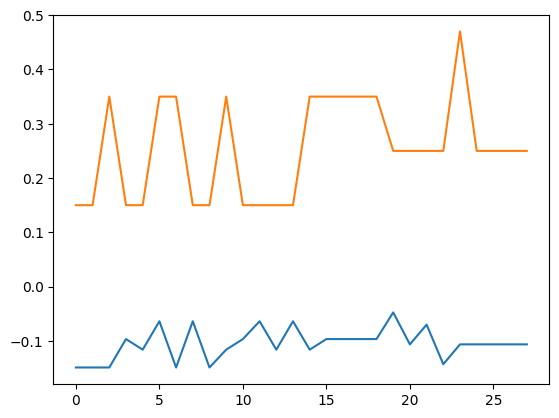

In [105]:
@m.Expression(m.I)
def trm(m, i):
    return - m.ai[3]*m.Cfeed[i, "Mn"] - m.ai[4]*m.Cfeed[i, "Co"]  -m.ai[5]*m.Cfeed[i, "Cu"] - m.ai[6]*m.Cfeed[i, "Ni"]

plt.plot(m.trm[:]())
plt.plot(m.C_ex[:]())

In [106]:
data_path_syensqo = 'Syensqo_DEHPA.xlsx'

df_syensqo = pd.read_excel(data_path_syensqo, sheet_name="DEHPA_combined")

In [107]:
df_syensqo

,pH,A/O,[D2EHPA],extraction_Mn,extraction_Co,extraction_Ni,extraction_Cu,Dobs_Mn,Dobs_Co,Dobs_Ni,...,log D (obs)_Cu,[Mn] (mol/L),[Co] (mol/L),[Ni] (mol/L),[Cu] (mol/L),Mn_el_fac,Co_el_fac,Ni_el_fac,Cu_el_fac,effective logD
0,1.40,1,0.1,0.3,0.0,0.0,0.0,0.000301,0.000000,0.000000,...,0.000000,0.01,0.00,0.00,0.00,1,0,0,0,-3.521574
1,1.69,1,0.1,1.0,0.0,0.0,0.0,0.001010,0.000000,0.000000,...,0.000000,0.01,0.00,0.00,0.00,1,0,0,0,-2.995635
2,2.19,1,0.1,9.0,0.0,0.0,0.0,0.009890,0.000000,0.000000,...,0.000000,0.01,0.00,0.00,0.00,1,0,0,0,-2.004799
3,2.26,1,0.1,14.0,0.0,0.0,0.0,0.016279,0.000000,0.000000,...,0.000000,0.01,0.00,0.00,0.00,1,0,0,0,-1.788370
4,2.39,1,0.1,19.6,0.0,0.0,0.0,0.024378,0.000000,0.000000,...,0.000000,0.01,0.00,0.00,0.00,1,0,0,0,-1.613000
5,2.41,1,0.1,20.3,0.0,0.0,0.0,0.025471,0.000000,0.000000,...,0.000000,0.01,0.00,0.00,0.00,1,0,0,0,-1.593962
6,2.62,1,0.1,32.0,0.0,0.0,0.0,0.047059,0.000000,0.000000,...,0.000000,0.01,0.00,0.00,0.00,1,0,0,0,-1.327359
7,2.82,1,0.1,44.0,0.0,0.0,0.0,0.078571,0.000000,0.000000,...,0.000000,0.01,0.00,0.00,0.00,1,0,0,0,-1.104735
8,2.96,1,0.1,69.0,0.0,0.0,0.0,0.222581,0.000000,0.000000,...,0.000000,0.01,0.00,0.00,0.00,1,0,0,0,-0.652513
9,3.33,1,0.1,77.0,0.0,0.0,0.0,0.334783,0.000000,0.000000,...,0.000000,0.01,0.00,0.00,0.00,1,0,0,0,-0.475237


In [108]:
syen_n_data = df_syensqo.shape[0]

param_scale = {'Mn':0.19, 'Co':5.6e-5, 'Ni':0.00014, 'Cu':0.000189}

Mn_break_point = 10
Co_break_point = 20
Ni_break_point = 30
Cu_break_point = syen_n_data-1

m.syen_I = pyo.RangeSet(0, syen_n_data-1)

m.syen_I_Mn = pyo.RangeSet(0, Mn_break_point)
m.syen_I_Co = pyo.RangeSet(Mn_break_point+1, Co_break_point)
m.syen_I_Ni = pyo.RangeSet(Co_break_point+1, Ni_break_point)
m.syen_I_Cu = pyo.RangeSet(Ni_break_point+1, Cu_break_point)

m.syen_pH = pyo.Var(m.syen_I, domain=pyo.Reals, initialize=0.0)
m.syen_C_ext = pyo.Var(m.syen_I, domain=pyo.Reals, initialize=0.0)
m.syen_C_ext_net = pyo.Var(m.syen_I, domain=pyo.Reals, initialize=0.0)
m.logsyen_C_ext_net = pyo.Var(m.syen_I, domain=pyo.Reals, initialize=0.0)
m.syen_Cfeed = pyo.Var(m.syen_I, m.elements, domain=pyo.Reals, initialize=0.0)

m.syen_logD_Mn = pyo.Var(m.syen_I_Mn, domain=pyo.Reals, initialize=0.0)
m.syen_logD_Co = pyo.Var(m.syen_I_Co, domain=pyo.Reals, initialize=0.0)
m.syen_logD_Ni = pyo.Var(m.syen_I_Ni, domain=pyo.Reals, initialize=0.0)
m.syen_logD_Cu = pyo.Var(m.syen_I_Cu, domain=pyo.Reals, initialize=0.0)

m.syen_logD_pred = pyo.Var(m.syen_I, domain=pyo.Reals, initialize=0.0)

m.syen_alpha = pyo.Var(m.syen_I, m.elements, domain=pyo.Reals, initialize=0.0)
m.syen_beta = pyo.Var(m.syen_I, m.elements, domain=pyo.Reals, initialize=0.0)

for i in df_syensqo.index:
    m.syen_pH[i].fix(df_syensqo['pH'][i])
    m.syen_C_ext[i].fix(df_syensqo['[D2EHPA] '][i])
    for element in m.elements:
        m.syen_Cfeed[i, element].fix(df_syensqo[f'[{element}] (mol/L)'][i])

for i in m.syen_I_Mn:
    m.syen_logD_Mn[i].fix(df_syensqo['log D (obs)_Mn'][i])

for i in m.syen_I_Co:
    m.syen_logD_Co[i].fix(df_syensqo['log D (obs)_Co'][i])

for i in m.syen_I_Ni:
    m.syen_logD_Ni[i].fix(df_syensqo['log D (obs)_Ni'][i])

for i in m.syen_I_Cu:
    m.syen_logD_Cu[i].fix(df_syensqo['log D (obs)_Cu'][i])

@m.Constraint(m.syen_I, m.elements)
def syen_alpha_const(m, i, e):
    linear_term = (m.a12[3, e]/param_scale['Mn'])*m.syen_Cfeed[i, "Mn"] + (m.a12[4, e]/param_scale['Co'])*m.syen_Cfeed[i, "Co"] +  (m.a12[5, e]/param_scale['Ni'])*m.syen_Cfeed[i, "Ni"] + (m.a12[6, e]/param_scale['Cu'])*m.syen_Cfeed[i, "Cu"]
    quad_term = m.c12[4, e]*(m.syen_Cfeed[i, "Cu"]/param_scale['Cu'])**2 + m.c12[3, e]*(m.syen_Cfeed[i, "Ni"]/param_scale['Ni'])**2 + m.c12[1, e]*(m.syen_Cfeed[i, "Mn"]/param_scale['Mn'])**2
    return (m.syen_alpha[i, e] - m.a12[1, e]  - m.a12[2, e]*m.syen_C_ext[i] 
            - linear_term 
            - quad_term 
            ) == 0

@m.Constraint(m.syen_I, m.elements)
def syen_b_const(m, i, e):
    return m.syen_beta[i, e] == m.b12[1, e] + m.b12[2, e]*m.logsyen_C_ext_net[i]

@m.Constraint(m.syen_I)
def syen_logCext_net_constraint(m, i):
    return 10**(m.logsyen_C_ext_net[i]) == m.syen_C_ext_net[i]

@m.Constraint(m.syen_I)
def syen_Cext_net_constraint(m, i):
    return m.syen_C_ext_net[i] == m.syen_C_ext[i] - m.ai[3]*m.syen_Cfeed[i, "Mn"] - m.ai[4]*m.syen_Cfeed[i, "Co"]  -m.ai[5]*m.syen_Cfeed[i, "Cu"] - m.ai[6]*m.syen_Cfeed[i, "Ni"] - m.ai[7]

@m.Constraint(m.syen_I)
def syen_logD_pred_constraint(m, i):
    return m.syen_logD_pred[i] == sum((m.syen_alpha[i, e]*m.syen_pH[i] + m.syen_beta[i, e])*df_syensqo[f"{e}_el_fac"][i] for e in m.elements)

results_syen = solver.solve(m, tee=True, symbolic_solver_labels=True)

     

Ipopt 3.13.2: halt_on_ampl_error=no
max_iter=200


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientif

In [109]:
m.syen_alpha.pprint()

syen_alpha : Size=152, Index=syen_I*elements
    Key        : Lower : Value               : Upper : Fixed : Stale : Domain
     (0, 'Co') :  None :  0.9808572752663962 :  None : False : False :  Reals
     (0, 'Cu') :  None :  1.4676179530787383 :  None : False : False :  Reals
     (0, 'Mn') :  None :  1.2932318636881264 :  None : False : False :  Reals
     (0, 'Ni') :  None :  0.7981623523958725 :  None : False : False :  Reals
     (1, 'Co') :  None :  0.9808572752663962 :  None : False : False :  Reals
     (1, 'Cu') :  None :  1.4676179530787383 :  None : False : False :  Reals
     (1, 'Mn') :  None :  1.2932318636881264 :  None : False : False :  Reals
     (1, 'Ni') :  None :  0.7981623523958725 :  None : False : False :  Reals
     (2, 'Co') :  None :  0.9808572752663962 :  None : False : False :  Reals
     (2, 'Cu') :  None :  1.4676179530787383 :  None : False : False :  Reals
     (2, 'Mn') :  None :  1.2932318636881264 :  None : False : False :  Reals
     (2, 'Ni') :  N

In [110]:
m.syen_logD_pred.pprint()

syen_logD_pred : Size=38, Index=syen_I
    Key : Lower : Value               : Upper : Fixed : Stale : Domain
      0 :  None : 0.05620609757304029 :  None : False : False :  Reals
      1 :  None :  0.4312433380425971 :  None : False : False :  Reals
      2 :  None :  1.0778592698866603 :  None : False : False :  Reals
      3 :  None :  1.1683855003448287 :  None : False : False :  Reals
      4 :  None :  1.3365056426242856 :  None : False : False :  Reals
      5 :  None :  1.3623702798980482 :  None : False : False :  Reals
      6 :  None :  1.6339489712725546 :  None : False : False :  Reals
      7 :  None :  1.8925953440101795 :  None : False : False :  Reals
      8 :  None :  2.0736478049265172 :  None : False : False :  Reals
      9 :  None :   2.552143594491124 :  None : False : False :  Reals
     10 :  None :  3.7419169090842006 :  None : False : False :  Reals
     11 :  None :  -52.05362631502171 :  None : False : False :  Reals
     12 :  None : -55.960731029175804 

In [139]:
df_da_silva_parameters = pd.DataFrame(
    columns=['a1i','a2i','c1i','c2i','c3i','c4i','d1i','d2i','d3i','b1i','b2i','f'],
    index=['Mn', 'Co', 'Ni', 'Cu','constant']
)
for e in elements:
    df_da_silva_parameters.loc[e, 'a1i'] = m.a12[1, e]()
    df_da_silva_parameters.loc[e, 'a2i'] = m.a12[2, e]()
    df_da_silva_parameters.loc[e, 'c1i'] = m.a12[3, e]()/param_scale['Mn']
    df_da_silva_parameters.loc[e, 'c2i'] = m.a12[4, e]()/param_scale['Co']
    df_da_silva_parameters.loc[e, 'c3i'] = m.a12[5, e]()/param_scale['Ni']
    df_da_silva_parameters.loc[e, 'c4i'] = m.a12[6, e]()/param_scale['Cu']
    df_da_silva_parameters.loc[e, 'd1i'] = m.c12[1, e]()/(param_scale['Mn']**2)
    df_da_silva_parameters.loc[e, 'd2i'] = m.c12[3, e]()/(param_scale['Ni']**2)
    df_da_silva_parameters.loc[e, 'd3i'] = m.c12[4, e]()/(param_scale['Cu']**2)
    df_da_silva_parameters.loc[e, 'b1i'] = m.b12[1, e]()
    df_da_silva_parameters.loc[e, 'b2i'] = m.b12[2, e]()

df_da_silva_parameters.loc['constant'] = np.zeros(len(df_da_silva_parameters.columns))
df_da_silva_parameters['f'] = [0.654, 5.43e-4, 553.809, 0, 0]
print(df_da_silva_parameters.index)

df_da_silva_parameters

Index(['Mn', 'Co', 'Ni', 'Cu', 'constant'], dtype='object')


,a1i,a2i,c1i,c2i,c3i,c4i,d1i,d2i,d3i,b1i,b2i,f
Mn,1.292176,1.043848,-10.657901,-882.658348,-7674.208143,3043.579178,32.503054,36822261.687102,-10738369.568383,-1.800181,-0.045615,0.654000
Co,0.89545,0.239603,6.579919,-2045.49334,-16959.123155,2403.701736,-43.517474,82337296.799415,-11012933.499702,-1.640907,0.011069,0.000543
Ni,0.631537,1.030786,6.869551,-1215.362154,-13182.937775,1512.669237,-51.492238,61158619.432829,-13802233.015913,-2.270452,-0.517046,553.809000
Cu,1.404779,0.025791,6.412369,-968.304264,-18700.109156,-2226.254172,-38.638349,91557467.627221,14192400.983948,-1.299746,0.32611,0.000000
constant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
